Este colab fue desarrollado por Arnold Charry Armero.

# EOQ con Descuentos (Economic Order Quantity) - Descuento Incremental

Por lo general, a medida que se ordena una mayor cantidad (volumen de producción), se obtiene un mayor descuento en el precio del producto; esto es, el precio por unidad $c$ disminuye progresivamente. Muchas empresas aceptan este descuento sin analizar si realmente es la decisión correcta. Esto porque a pesar de que se tiene un ahorro por la disminución en el precio, se aumentan los costos de mantener las unidades en inventario (Sipper & Bulfin, 1998). Por lo tanto, no es una decisión que se pueda tomar sin realizar varios cálculos que la respalden. En este colab de Python se explorará cómo seleccionar la cantidad óptima de lote en el caso de que se tenga un descuento incremental.

**Supuestos:**

*   Existe un solo producto en el sistema de inventarios
*   La demanda es uniforme y determinística
*   No se permiten faltantes
*   No hay un tiempo de entrega
*   Tasa de reabastecimiento infinita, es decir, toda la cantidad ordenada llega al mismo tiempo.
*   El precio cambia a medida que aumenta la cantidad de lote a ordenar

Gráficamente se puede observar de la siguiente manera,

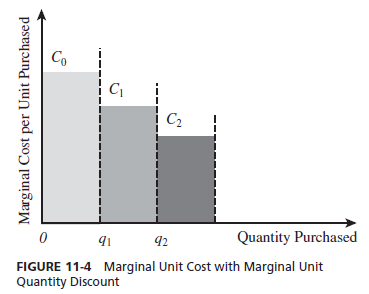

Matemáticamente, el modelo se expresa de la siguiente manera:

$$ K_{j}(Q)= \frac{C_{j}(Q)}{Q}D + \frac{AD}{Q}+i \left ( \frac{C_{j}(Q)}{Q} \right ) \left ( \frac{Q}{2} \right ) $$

donde,

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ C_{j} = \mathrm{Costo \: unitario \:} j \mathrm{\: de \: compra} $

$ D = \mathrm{Tasa \:de \: demanda} $

$ A = \mathrm{Costo \:unitario \: de \: ordenar} $

$ i = \mathrm{Porcentaje \:}\mathrm{ de \: mantener \: en \: inventario} $

$ K_{j} = \mathrm{Costo \: total \: promedio \: por \:  intervalo \: } j$

Para saber la cantidad óptima de lote a ordenar, se debe derivar la función e igualar a 0. Una vez se ha simplificado, se despeja $Q^{*}$ quedando de la siguiente manera,

$$ Q_{j} = \sqrt{\frac{2D\left [ A + C(q_{j-1}) - c_{j} (q_{j}-1) \right ]}{ic_{j}}} $$

Para saber cuál es el valor óptimo global, se debe de evaluar cada uno de los intervalos por medio de un algoritmo simple. Si el valor de $Q$ para cada intervalo es mayor o menor a los límites del intervalo, se asume que $Q = 0$ y $K = \infty$ y se continúa con el siguiente intervalo. Se obtendrá una lista de valores óptimos y se escoge el menor de todos ellos como el valor óptimo global. Este procedimiento se ilustra con el siguiente ejemplo.


**Ejemplo 6-6. Descuentos por cantidad.** Coldpoint es un fabricante de electrodomésticos. La
compañía compra cierta componente para sus productos. Southern Electronics y Electro Tech son
dos compañías que producen esta componente, y sus productos y servicios son iguales, de manera
que comprarán la componente con base sólo en el costo. Ambas compañías ofrecen descuentos por
cantidad según el tamaño de la orden. No obstante, estas dos empresas tienen diferentes planes de
precios. En Southern Electronics, si la cantidad ordenada es menor que 500 unidades, el precio es
$\$0.60$ por unidad; si la cantidad es 500 o más, pero menos de 1000, el precio unitario es $\$0.58$;
cualquier cantidad mayor o igual a 1000 unidades tiene un precio unitario de $\$0.56$. ElectroTech
ofrece el mismo rango de precios y cantidades; sin embargo, la tasa de descuento se aplica sólo a la
cantidad ordenada en exceso. Es decir, si la cantidad ordenada es 500 unidades, las primeras 499
cuestan $\$0.60$ y la que sigue cuesta $\$0.58$. Si se ordenan 1000 unidades, las primeras 499 cuestan
$\$0.60$ y las siguientes 500 [500,999] cuestan $\$0.58$. Cualquier cantidad mayor o igual a 1000 cuesta
$\$0.56$. La tabla 6-1 describe los dos planes de precios.

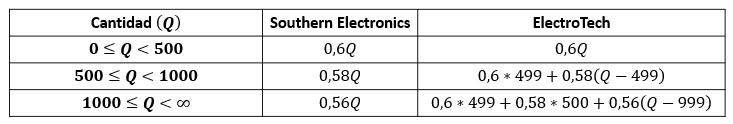

**Ejemplo 6-7- Descuento en todas las unidades.** Continuamos con el ejemplo de Coldpoint. La
compañía estima que el costo de colocar una orden es $\$20$ y que la demanda anual uniforme para este
subcomponente es 800 unidades. El costo de mantener el inventario es $20$% anual. Se desea encontrar
la mejor política de compra si la subcomponente se ordena a Southern Electronics.

**Ejemplo 6.8.** **Descuento incremental.** Si Coldpoint considera comprar a ElectroTech la componente,
¿cuál es la mejor política de compra?

In [ ]:
#Se importan las librerias
import scipy.optimize as optimize
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
#Se definen los parámetros.
c1 = 0.6
c2 = 0.58
c3 = 0.56
D = 800
A = 20
i = 0.2
h1 = c1 * i
q0 = 0
q1 = 500
q2 = 1000

In [ ]:
#Se define la función
def K_piecewise_incremental(Q):
  """
  Calcula el costo total promedio tomando en
  cuenta el tamaño de lote Q ingresado

  Args:
    Q: Tamaño de lote seleccionado.

  Returns:
    K_piecewise: Costo total promedio
  """
  if Q >= q0 and Q < q1:
    return c1*D + (A*D)/ Q + i * c1 * (Q/2)
  elif Q >= q1 and Q < q2:
    return (((c2 - c1)*(q1 - 1))/Q + c2) * D + (A*D)/ Q + i * (((c2 - c1)*(q1 - 1))/Q + c2) * (Q/2)
  elif Q >= q2:
    return ((c1 * (q1 - 1) + c2 * ((q2 - 1) - (q1 - 1)) - c3 * (q2 - 1)) / Q + c3)*D + (A*D)/ Q + i * ((c1 * (q1 - 1) + c2 * ((q2 - 1) - (q1 - 1)) - c3 * (q2 - 1)) / Q + c3) * (Q/2)

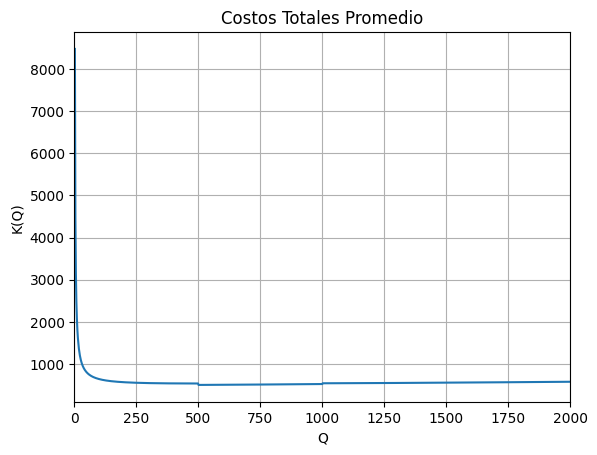

In [ ]:
#Se grafica la función para entender mejor su comportamiento
x = np.linspace(0, 2000, 1000)
y = [K_piecewise_incremental(Q) for Q in x]
plt.grid()
plt.title("Costos Totales Promedio")
plt.xlim(0, 2000)
plt.xlabel('Q')
plt.ylabel('K(Q)')
plt.plot(x, y)

Para ver de una mejor manera los cambios en la gráfica, se utilizarán los tres intervalos por separado.

In [ ]:
#Interval 1
def interval_funct1(x):
  return c1*D + (A*D)/ x + i * c1 * (x/2)

#Interval 2
def interval_funct2(x):
  return (((c2 - c1)*(q1 - 1))/x + c2) * D + (A*D)/ x + i * (((c2 - c1)*(q1 - 1))/x + c2) * (x/2)

#Interval 3
def interval_funct3(x):
  return ((c1 * (q1 - 1) + c2 * ((q2 - 1) - (q1 - 1)) - c3 * (q2 - 1)) / x + c3)*D + (A*D)/ x + i * ((c1 * (q1 - 1) + c2 * ((q2 - 1) - (q1 - 1)) - c3 * (q2 - 1)) / x + c3) * (x/2)

Text(0, 0.5, 'K(Q)')

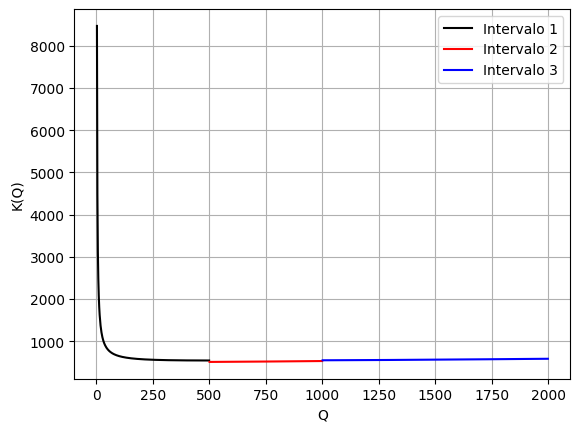

In [ ]:
#Gráfica
x = np.linspace(0,2000,1000)
y = np.piecewise(x, [(q0 < x) & (x < q1), (q1 <= x) & (x < q2), (q2 <= x) & (x < 2000)],
                 [lambda x: interval_funct1(x), lambda x: interval_funct2(x), lambda x: interval_funct3(x)])

interval_funct1 = np.vectorize(interval_funct1)

plt.plot(x[(q0 < x) & (x < q1)], interval_funct1(x[(q0 < x) & (x < q1)]), label = "Intervalo 1", c = "black")
plt.plot(x[(q1 <= x) & (x < q2)], interval_funct2(x[(q1 <= x) & (x < q2)]), label="Intervalo 2", c = "red")
plt.plot(x[(q2 <= x) & (x < 2000)], interval_funct3(x[(q2 <= x) & (x < 2000)]), label="Intervalo 3", c = "blue")

plt.grid(True)
plt.legend()
plt.xlabel('Q')
plt.ylabel('K(Q)')

Se desarrolla el algoritmo,

In [55]:
#Se definen los valores Cq
C = [c1, c2, c3]
q = [q0, q1, q2, 2000]
Cq = []

for j in range(len(C)):
  if j == 0:
    s = 0
    Cq.append(0)
  elif j == 1:
    s = C[j-1] * (q[j] - 1) + s
    Cq.append(s)
  else:
    s = C[j-1] * ((q[j] - 1) - (q[j-1] - 1)) + s
    Cq.append(s)

#Visualizamos los valores Cq
print(Cq)

[0, 299.4, 589.4]


In [56]:
#Se obtienen los valores Cj
Cj = []
for j in range(len(C)):
  if j == 0:
    Cj.append(0)
  else:
    Cp = Cq[j] - C[j] * (q[j] - 1)
    Cj.append(Cp)

#Visualizamos los valores Cj
print(Cj)

[0, 9.980000000000018, 29.959999999999923]


In [57]:
#Ahora se calculan los Q y K óptimos por intervalo
Q = []
K = []

for j in range(len(C)):
  if j == 0:
    Qj = np.sqrt((2 * D * (A + Cq[j] - C[j] * q[j])) / (i * C[j]))
    if Qj >= q[j] and Qj < q[j + 1]:
      Q.append(Qj)
      Kj = (Cj[j]/Qj + C[j]) * D + ((A * D / Qj) + i * (Cj[j]/Qj + C[j]) * (Qj/2))
      K.append(Kj)
    else:
      Q.append(0)
      K.append(np.inf)
  else:
    Qj = np.sqrt((2 * D * (A + Cq[j] - C[j] * (q[j] - 1))) / (i * C[j]))
    if Qj >= q[j] and Qj < q[j + 1]:
      Q.append(Qj)
      Kj = (Cj[j]/Qj + C[j]) * D + ((A * D / Qj) + i * (Cj[j]/Qj + C[j]) * (Qj/2))
      K.append(Kj)
    else:
      Q.append(0)
      K.append(np.inf)

In [58]:
#Imprimimos la lista de valores
print("Q óptimos {}".format(Q))
print("K óptimos {}".format(K))

Q óptimos [0, 643.0530626467078, 0]
K óptimos [inf, 539.592155267018, inf]


In [59]:
#Se le pide a Python que nos indique el mínimo
#en todos los intervalos

min_Q = 0
min_c = 0
min_K = None

for j in range(len(K)):
  if min_K is None or min_K > K[j]:
    min_K = K[j]
    min_Q = Q[j]
    min_c = C[j]

In [60]:
#Resultados
print("-----RESULTADOS-----")
print("La cantidad óptima a ordenar es de {} unidades.".format(min_Q))
print("El precio unitario utilizado es de ${}.".format(min_c))
print("El costo total minimizado es de ${}.".format(min_K))

-----RESULTADOS-----
La cantidad óptima a ordenar es de 643.0530626467078 unidades.
El precio unitario utilizado es de $0.58.
El costo total minimizado es de $539.592155267018.


De esta manera, queda por concluido el tema del EOQ con Descuentos incrementales.

#### Referencias


*  Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Stewart, J. (2018). Cálculo de una variable: trascendentes tempranas.